# Summary

Our research question is "How have gun ownership practices and social attitudes towards gun control changed over the past 50 years?"

# Data

In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv('selected_gss_data.csv', low_memory=False)
print(df.shape, '\n')
print(df.dtypes, '\n')
df.head()

(72390, 5) 

year       int64
id         int64
gunlaw    object
owngun    object
hunt      object
dtype: object 



,year,id,gunlaw,owngun,hunt
0,1972,1,favor,NaN,NaN
1,1972,2,favor,NaN,NaN
2,1972,3,favor,NaN,NaN
3,1972,4,favor,NaN,NaN
4,1972,5,favor,NaN,NaN


### Verify year/id is clean

In [58]:
year = df['year']
year.unique()

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998,
       2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2021,
       2022], dtype=int64)

In [59]:
year.value_counts()     # Represents how many respondents were in each year

year
2006    4510
2021    4032
2022    3544
1994    2992
1996    2904
2016    2867
1998    2832
2000    2817
2004    2812
2002    2765
2014    2538
2018    2348
2010    2044
2008    2023
2012    1974
1982    1860
1987    1819
1972    1613
1993    1606
1983    1599
1989    1537
1985    1534
1978    1532
1977    1530
1991    1517
1973    1504
1976    1499
1975    1490
1974    1484
1988    1481
1984    1473
1986    1470
1980    1468
1990    1372
Name: count, dtype: int64

In [60]:
print('Total missing: ', sum(year.isnull()))

Total missing:  0


In [61]:
id = df['id']
id.unique()

array([   1,    2,    3, ..., 4508, 4509, 4510], dtype=int64)

In [62]:
id.value_counts()   # Represents how many years each respondant participated in

id
1       34
727     34
711     34
712     34
713     34
        ..
4278     1
3671     1
3669     1
3665     1
4510     1
Name: count, Length: 4510, dtype: int64

In [63]:
print('Total missing: ', sum(id.isnull()))

Total missing:  0


### Clean gunlaw

In [64]:
gunlaw = df['gunlaw']
gunlaw.value_counts()

gunlaw
favor     36367
oppose    11940
Name: count, dtype: int64

From the codebook, the missing values represent "Don't Know", "No Answer", "Not Applicable", or "Skipped on Web"

In [65]:
print('Total missing: ', sum(gunlaw.isnull()))

Total missing:  24083


Make a subset of the dataframe for observations with valid responses to the gunlaw question

In [66]:
del gunlaw
df_gunlaw = df.dropna(axis=0, subset=['gunlaw'])
print(sum(df_gunlaw['gunlaw'].isnull()))
df_gunlaw.head(10)

0


,year,id,gunlaw,owngun,hunt
0,1972,1,favor,NaN,NaN
1,1972,2,favor,NaN,NaN
2,1972,3,favor,NaN,NaN
3,1972,4,favor,NaN,NaN
4,1972,5,favor,NaN,NaN
5,1972,6,oppose,NaN,NaN
6,1972,7,favor,NaN,NaN
7,1972,8,favor,NaN,NaN
8,1972,9,favor,NaN,NaN
9,1972,10,favor,NaN,NaN


### Clean owngun

In [67]:
owngun = df['owngun']
owngun.value_counts()

owngun
no             27551
yes            17800
refused_(3)      512
Name: count, dtype: int64

In [68]:
print('Total missing: ', sum(owngun.isnull()))

Total missing:  26527


Replace refuesed with nan, they chose to not answer

In [69]:
owngun = owngun.replace(['refused_(3)'], np.nan)
owngun.value_counts()

owngun
no     27551
yes    17800
Name: count, dtype: int64

In [70]:
print('Total missing: ', sum(owngun.isnull()))

Total missing:  27039


In [71]:
df['owngun'] = owngun
del owngun
print('Total missing: ', sum(df['owngun'].isnull()))
df['owngun'].value_counts()

Total missing:  27039


owngun
no     27551
yes    17800
Name: count, dtype: int64

Make a subset of the dataframe for observations with valid responses to the owngun question

In [72]:
df_owngun = df.dropna(axis=0, subset=['owngun'])
print(sum(df_owngun['owngun'].isnull()))
df_owngun.head(10)

0


,year,id,gunlaw,owngun,hunt
1613,1973,1,oppose,yes,NaN
1614,1973,2,oppose,yes,NaN
1615,1973,3,oppose,yes,NaN
1616,1973,4,oppose,yes,NaN
1617,1973,5,favor,yes,NaN
1618,1973,6,favor,no,NaN
1619,1973,7,favor,no,NaN
1620,1973,8,favor,no,NaN
1621,1973,9,favor,no,NaN
1622,1973,10,favor,no,NaN


### Clean hunt

In [73]:
hunt = df['hunt']
hunt.value_counts()

hunt
no, neither r nor spouse hunts    33607
yes, respondent does               4975
yes, spouse does                   2072
yes, both do                        920
Name: count, dtype: int64

In [74]:
print('Total missing: ', sum(hunt.isnull()))

Total missing:  30816


Combine responses for hunt so the question simply represents either the respondent's family does hunt or not

In [75]:
hunt = hunt.replace(['yes, respondent does', 'yes, spouse does','yes, both do'], 'yes')
hunt = hunt.replace(['no, neither r nor spouse hunts'], 'no')
hunt.value_counts()

hunt
no     33607
yes     7967
Name: count, dtype: int64

In [76]:
df['hunt'] = hunt
del hunt
print('Total missing: ', sum(df['hunt'].isnull()))
df['hunt'].value_counts()

Total missing:  30816


hunt
no     33607
yes     7967
Name: count, dtype: int64

Make a subset of the dataframe for observations with valid responses to the hunt question

In [77]:
df_hunt = df.dropna(axis=0, subset=['hunt'])
print(sum(df_hunt['hunt'].isnull()))
df_hunt.head(10)

0


,year,id,gunlaw,owngun,hunt
7590,1977,1,favor,no,no
7591,1977,2,oppose,no,no
7592,1977,3,favor,no,no
7593,1977,4,favor,no,no
7594,1977,5,favor,no,no
7595,1977,6,favor,no,no
7596,1977,7,favor,no,no
7597,1977,8,favor,no,no
7598,1977,9,oppose,no,no
7599,1977,10,favor,no,no


### Final cleaning

Drop rows in overall df where all variables of interest (gunlaw, owngun, and hunt) are nan

In [78]:
print(df.shape)
df = df.dropna(axis=0, subset=['gunlaw', 'owngun', 'hunt'], how='all')
print(df.shape)

(72390, 5)
(49129, 5)


Export to csv

In [79]:
df.to_csv('cleaned_gss.csv', header=['year', 'id', 'gunlaw', 'owngun', 'hunt'], index=False)

# Results

In [80]:
pd.crosstab(df['gunlaw'],df['owngun'],normalize='index')  # this is across all time, try grouping by 10 year ranges to see a trend

owngun,no,yes
gunlaw,,
favor,0.668511,0.331489
oppose,0.411541,0.588459


In [81]:
pd.crosstab(df['gunlaw'],df['hunt'],normalize='index')

hunt,no,yes
gunlaw,,
favor,0.858510,0.141490
oppose,0.650559,0.349441


In [82]:
#Import dependencies to create visulizations
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis of Social Attitudes Changes

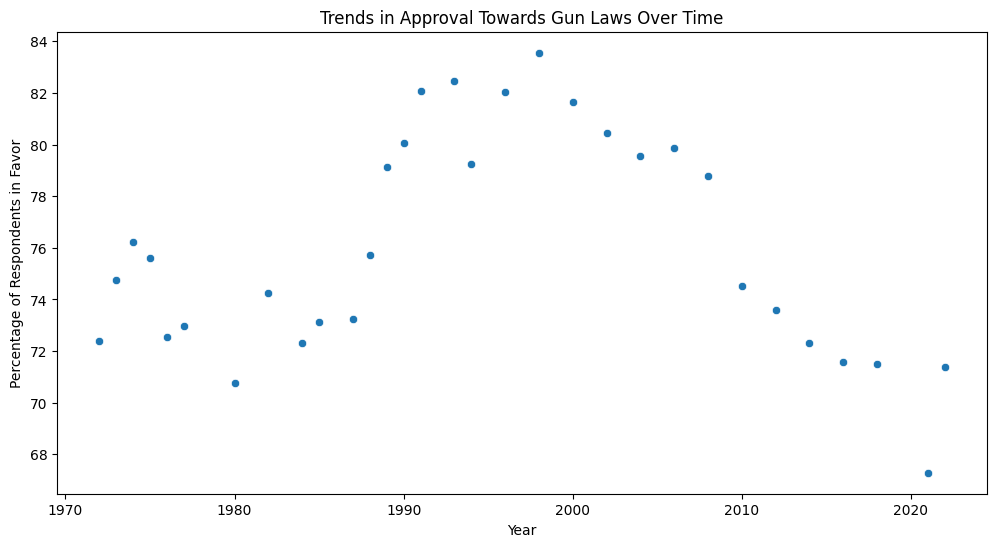

In [113]:
#GRAPH DOES NOT SHOW ANYTHING, SHOULD NOT BE INCLUDED IN FINAL PRODUCT

# Takes the gunlaw dataframe and creates a new dataframe with the counts of votes in favor and oppose for each year
gunlaw_vote_count = df_gunlaw.groupby(['year', 'gunlaw']).size().unstack()
# Convert counts to percentages for each year
gunlaw_trends_percentage = gunlaw_vote_count.div(gunlaw_vote_count.sum(axis=1), axis=0) * 100  
# Drop the oppose column as graphing this would be redudant
gunlaw_approve_percentage = gunlaw_trends_percentage.drop(columns = 'oppose')

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(data = gunlaw_approve_percentage, x='year', y='favor')
plt.title('Trends in Approval Towards Gun Laws Over Time')
plt.ylabel('Percentage of Respondents in Favor') 
plt.xlabel('Year')
plt.show()

#### As seen from this graph, it seems as though there is no certain trend over the years for favoring/not favoring gun laws over the years as there was a increase between 1970-1990s and a decrease between 2000-2020. This increase-to-decrease could be due to multiple reasonings and it's hard to say what could have caused this. There could also be bias to those who own guns vs. don't own guns, we explore this possibility below

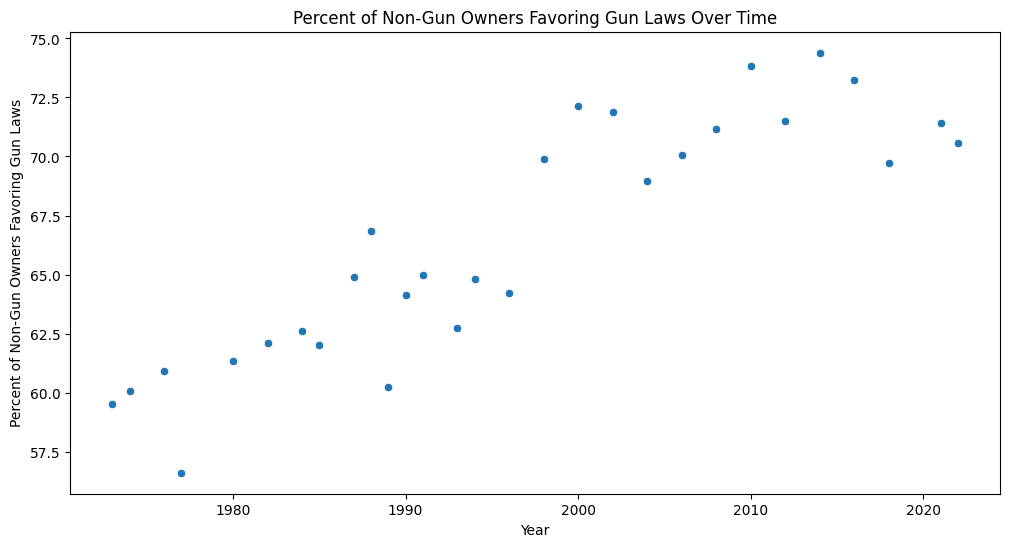

In [123]:
# Filter for respondents who favor gun laws
favor_gunlaw = df[df['gunlaw'] == 'favor']

# Group by year and owngun and calculate the size of each group
favor_gunlaw_count = favor_gunlaw.groupby(['year', 'owngun']).size().unstack()

# Calculate the precent of respondents who do not own a gun each year among those who favor gun laws
favor_gunlaw_count['no_percent'] = (favor_gunlaw_count['no'] / (favor_gunlaw_count['yes'] + favor_gunlaw_count['no'])) * 100

# Get year to be a col again
favor_gunlaw_count.reset_index(inplace=True)

# Plotting 
plt.figure(figsize=(12, 6))
sns.scatterplot(x=favor_gunlaw_count['year'], y=favor_gunlaw_count['no_percent'])
plt.title('Percent of Non-Gun Owners Favoring Gun Laws Over Time')
plt.xlabel('Year')
plt.ylabel('Percent of Non-Gun Owners Favoring Gun Laws')
plt.show()

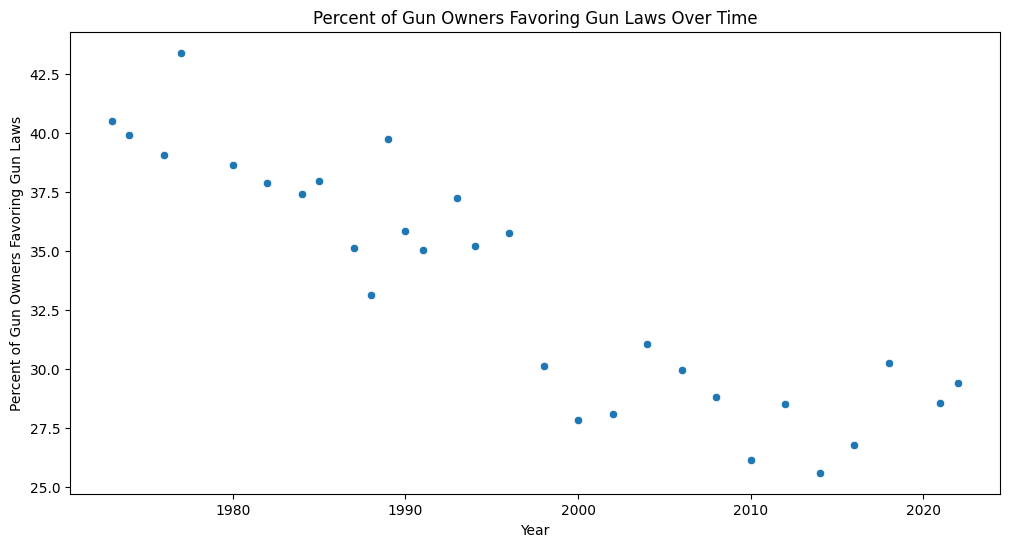

In [115]:
# Filter for respondents who favor gun laws
favor_gunlaw = df[df['gunlaw'] == 'favor']

# Group by year and owngun and calculate the size of each group
favor_gunlaw_count = favor_gunlaw.groupby(['year', 'owngun']).size().unstack()

# Calculate the percent of respondents who own a gun each year among those who favor gun laws
favor_gunlaw_count['yes_percent'] = (favor_gunlaw_count['yes'] / (favor_gunlaw_count['yes'] + favor_gunlaw_count['no'])) * 100

# Get year to be a column again
favor_gunlaw_count.reset_index(inplace=True)

# Plotting 
plt.figure(figsize=(12, 6))
sns.scatterplot(x=favor_gunlaw_count['year'], y=favor_gunlaw_count['yes_percent'])
plt.title('Percent of Gun Owners Favoring Gun Laws Over Time')
plt.xlabel('Year')
plt.ylabel('Percent of Gun Owners Favoring Gun Laws')
plt.show()

### Further Analysis

#### There is a clear distinction on favoring trends between gun owners vs. non-gun owners. This makes the previous scatter on both groups' favorings clear on why it was indistinguishable on its trends. It was only during the 1990s where both parties significantly favored gun laws . Let's futher explore gun ownership practices below and compare trends of social attitudes to them. We will use the trend of percent of non-gun owners favoring gun laws for further analysis (not for any particular reason).

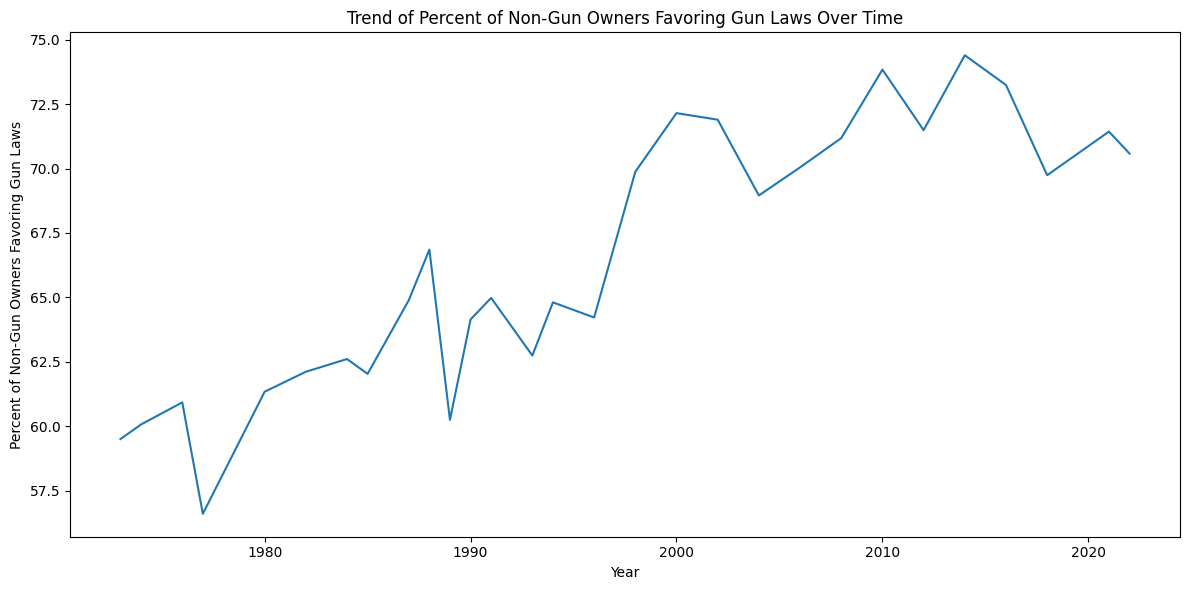

In [119]:
favor_gunlaw_count['year'] = favor_gunlaw_count['year'].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(data=favor_gunlaw_count, x='year', y='no_percent')
plt.title('Trend of Percent of Non-Gun Owners Favoring Gun Laws Over Time')
plt.xlabel('Year')
plt.ylabel('Percent of Non-Gun Owners Favoring Gun Laws')
plt.tight_layout()
plt.show()

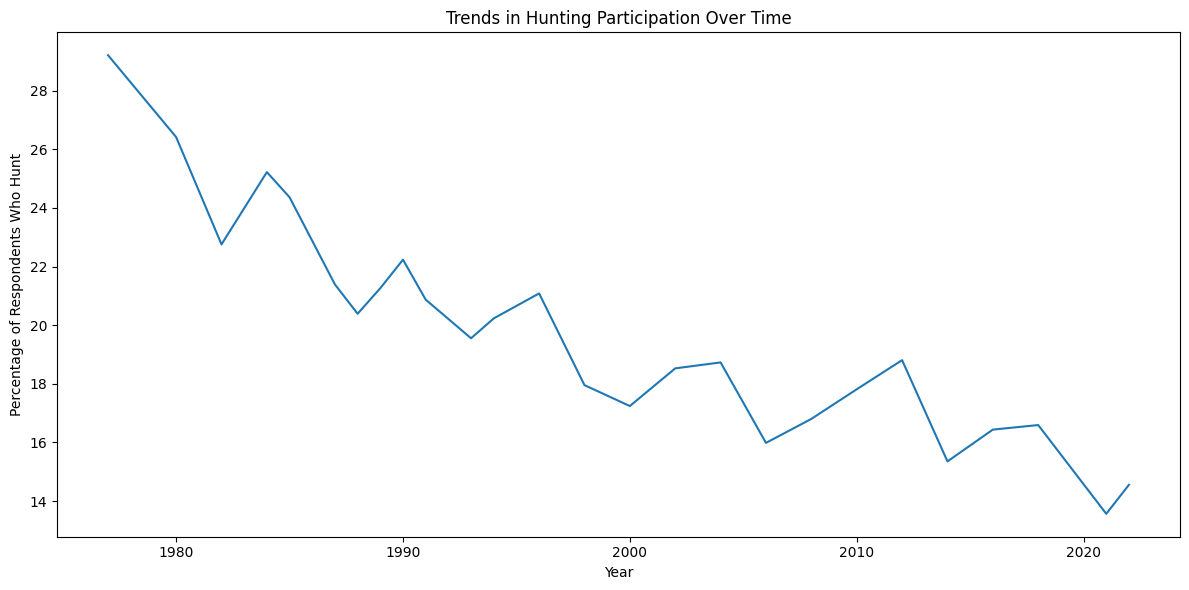

In [120]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=hunting_percentage, x='year', y='yes')

plt.title('Trends in Hunting Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Respondents Who Hunt')


plt.tight_layout()

plt.show()

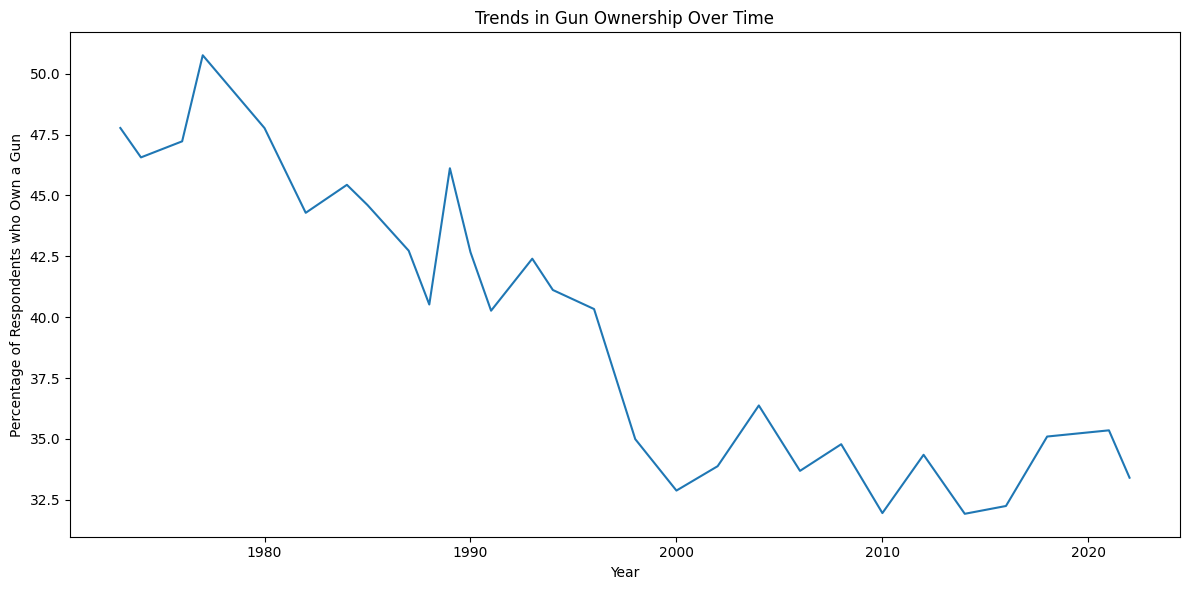

In [121]:
plt.figure(figsize=(12, 6))

# Create the line plot for gun ownership trends
sns.lineplot(data=owngun_percentage, x='year', y='yes')

# Add title and labels
plt.title('Trends in Gun Ownership Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Respondents who Own a Gun')


# Ensure everything fits nicely in the plot area
plt.tight_layout()

# Show the plot
plt.show()

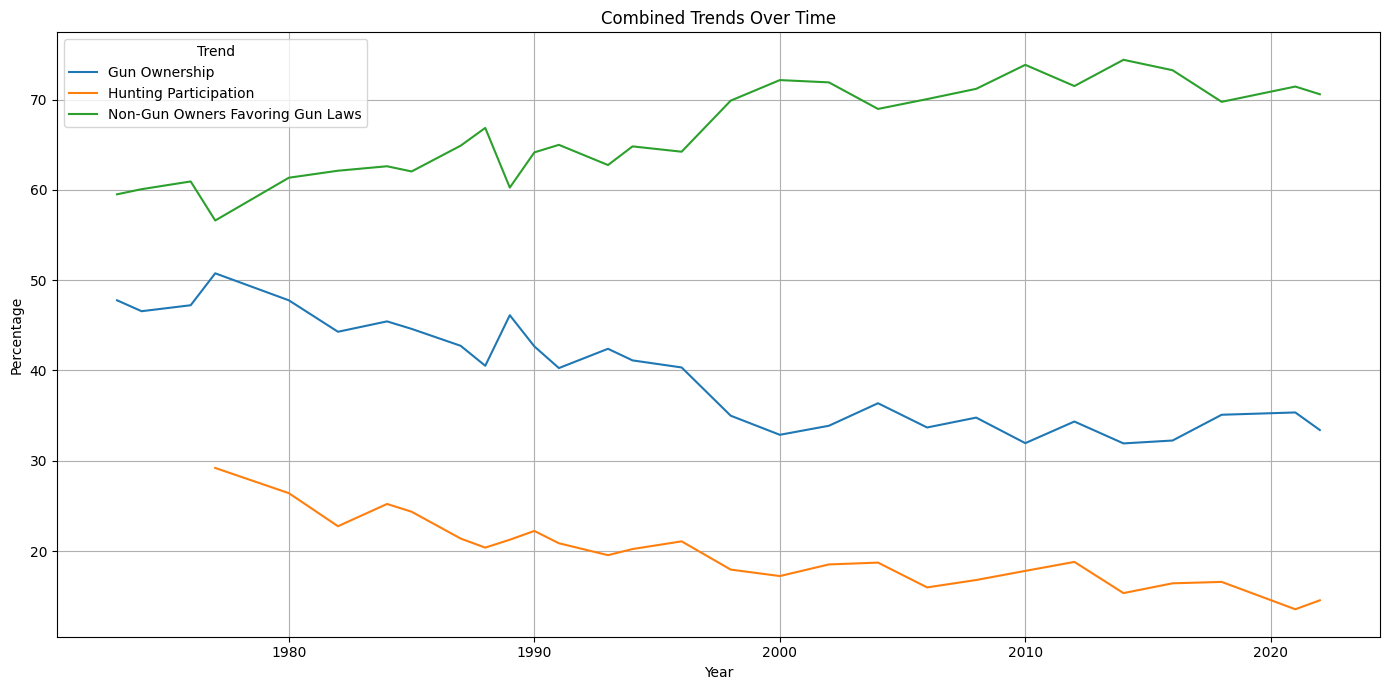

In [124]:
plt.figure(figsize=(14, 7))

# Line plot for gun ownership trends
sns.lineplot(data=owngun_percentage, x='year', y='yes', label='Gun Ownership')

# Line plot for hunting participation trends
sns.lineplot(data=hunting_percentage, x='year', y='yes', label='Hunting Participation')

# Line plot for the percent of non-gun owners favoring gun laws
sns.lineplot(data=favor_gunlaw_count, x='year', y='no_percent', label='Non-Gun Owners Favoring Gun Laws')

# Adding the title and labels for the axes
plt.title('Combined Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')

# Adding a legend to distinguish the lines
plt.legend(title='Trend')

# Display the grid
plt.grid(True)

# Ensure everything fits nicely in the plot area
plt.tight_layout()

# Show the plot
plt.show()

## Analysis of Gun Ownership Practices

#### It seems as though as hunting practices has significantly decreased over the years, this could be due to a handful of reasons, such as a shift in recreational habits, potentially driven by changing cultural values, increased urbanization, or greater environmental consciousness. The decreasing trend in gun ownership suggests a change in gun ownership practices, with possibly fewer households owning guns or individuals owning fewer guns.

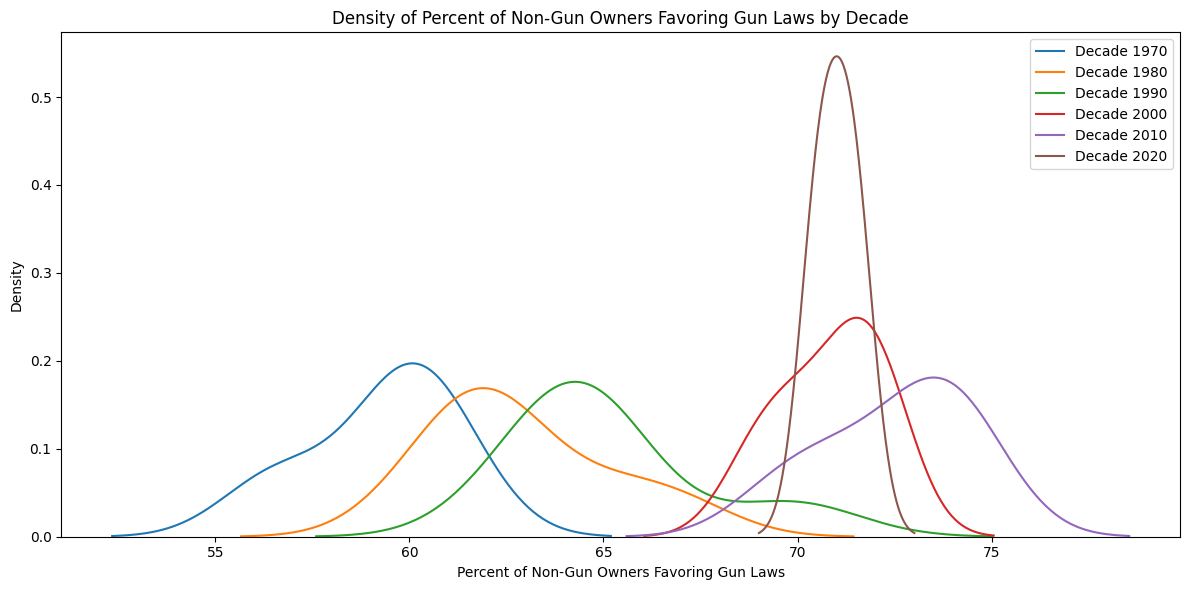

In [125]:
favor_gunlaw_count['decade'] = (favor_gunlaw_count['year'] // 10) * 10

plt.figure(figsize=(12, 6))
# Now, let's plot KDE plots for each decade. We use a loop to iterate through the decades and plot each one.
decades = favor_gunlaw_count['decade'].unique()
for decade in sorted(decades):
    subset = favor_gunlaw_count[favor_gunlaw_count['decade'] == decade]
    sns.kdeplot(subset['no_percent'], label=f'Decade {decade}')

plt.title('Density of Percent of Non-Gun Owners Favoring Gun Laws by Decade')
plt.xlabel('Percent of Non-Gun Owners Favoring Gun Laws')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

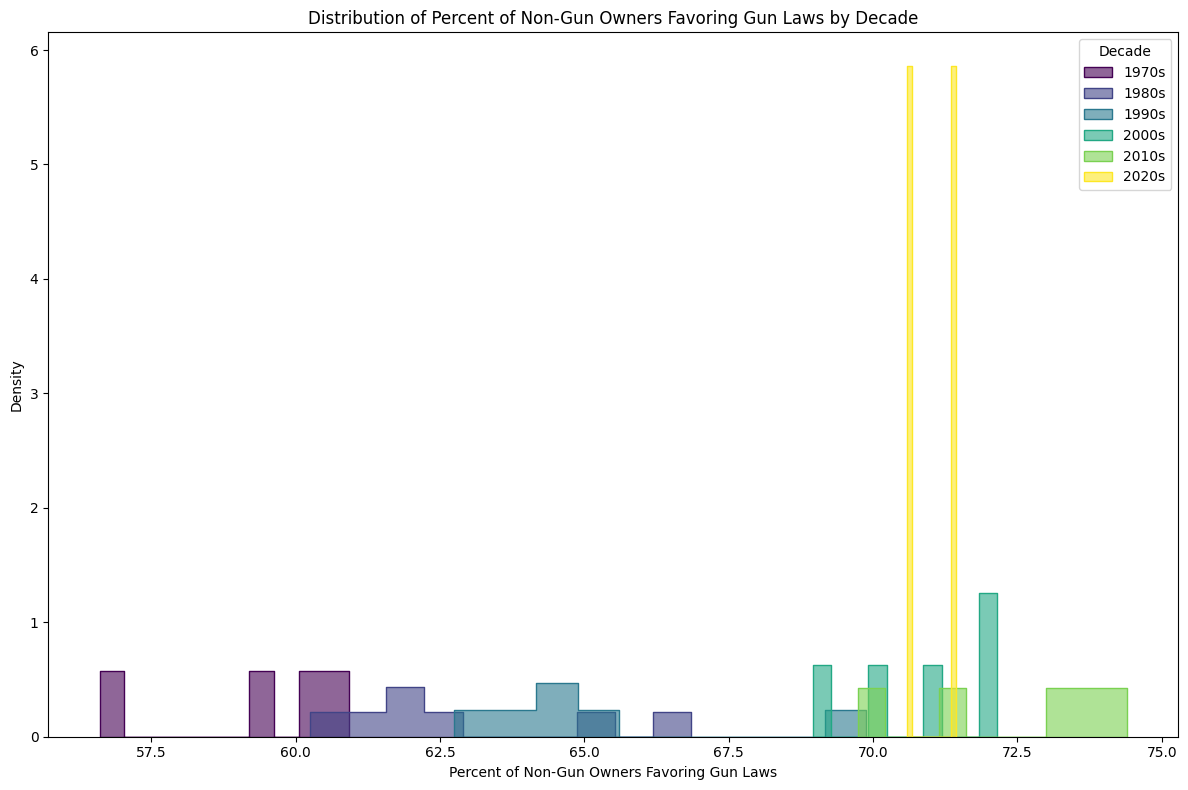

In [ ]:
favor_gunlaw_count['decade'] = (favor_gunlaw_count['year'] // 10) * 10

# Get unique decades to plot
decades = sorted(favor_gunlaw_count['decade'].unique())

plt.figure(figsize=(12, 8))

# Define a colormap to use different colors for each decade histogram
colors = plt.cm.viridis(np.linspace(0, 1, len(decades)))

for i, decade in enumerate(decades):
    # Select the subset of the dataframe for the current decade
    subset = favor_gunlaw_count[favor_gunlaw_count['decade'] == decade]
    
    # Plot the histogram for the current decade
    sns.histplot(subset['no_percent'], label=f'{decade}s', color=colors[i], alpha=0.6, kde=False, bins=10, element='step', stat='density')

plt.title('Distribution of Percent of Non-Gun Owners Favoring Gun Laws by Decade')
plt.xlabel('Percent of Non-Gun Owners Favoring Gun Laws')
plt.ylabel('Density')
plt.legend(title='Decade')
plt.tight_layout()
plt.show()

In [ ]:
gunlaw_approval_summary = gunlaw_approve_percentage['favor'].describe()
owngun_summary = owngun_percentage['yes'].describe()
hunting_summary = hunting_percentage['yes'].describe()


print(gunlaw_approval_summary)
print(owngun_summary)
print(hunting_summary)

count    31.000000
mean     75.966702
std       4.286194
min      67.284569
25%      72.480759
50%      74.761905
75%      79.725626
max      83.560152
Name: favor, dtype: float64
count    29.000000
mean     39.706471
std       5.862312
min      31.925166
25%      34.348165
50%      40.334378
75%      44.605263
max      50.757077
Name: yes, dtype: float64
count    26.000000
mean     19.743793
std       3.763480
min      13.565217
25%      16.912121
50%      19.180206
75%      21.357430
max      29.207597
Name: yes, dtype: float64
